In [1]:
import yellowcab

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
trip_data = yellowcab.io.read_all_files('parquet')

In [3]:
# information known at the start of the trip
known = ["trip_distance", "passenger_count", "PULocationID", "start_month", "start_day", 
         "start_hour", "start_week", "weekend", "weekday", "start_location_long", 
         "start_location_lat", "PUBorough", "PUZone", "PUservice_zone"]

In [4]:
# contains all information / columns avaiable at the start of the trip
trip_data_start = trip_data[known]

In [5]:
# this cell can be removed after the associated issue is fixed
trip_data_start = trip_data_start[trip_data_start["trip_distance"] > 0]

In [6]:
trip_data_describe = trip_data_start
trip_data_describe["PULocationID"] = trip_data_describe["PULocationID"].astype("string")
trip_data_describe[["PULocationID", "PUBorough", "PUZone", "PUservice_zone"]].describe()

,PULocationID,PUBorough,PUZone,PUservice_zone
count,7293205,7293205,7293205,7293205
unique,258,6,257,4
top,48,Manhattan,Clinton East,Yellow Zone
freq,694743,6430145,694743,6084482


The difference in the unique features of id and zone, is the result of the zone "corona" which has the id 56 and 57.

In [7]:
trip_data_start

,trip_distance,passenger_count,PULocationID,start_month,start_day,start_hour,start_week,weekend,weekday,start_location_long,start_location_lat,PUBorough,PUZone,PUservice_zone
0,0.70,2.0,246,1,1,0,1,0,3,-73.941399,40.841709,Manhattan,West Chelsea/Hudson Yards,Yellow Zone
1,1.39,1.0,246,1,1,0,1,0,3,-73.941399,40.841709,Manhattan,West Chelsea/Hudson Yards,Yellow Zone
2,2.15,1.0,246,1,1,0,1,0,3,-73.941399,40.841709,Manhattan,West Chelsea/Hudson Yards,Yellow Zone
3,0.50,1.0,246,1,1,0,1,0,3,-73.941399,40.841709,Manhattan,West Chelsea/Hudson Yards,Yellow Zone
4,1.29,1.0,246,1,1,0,1,0,3,-73.941399,40.841709,Manhattan,West Chelsea/Hudson Yards,Yellow Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7375512,8.80,1.0,132,1,20,19,4,0,1,-73.968168,40.797962,Queens,JFK Airport,Airports
7375513,8.61,2.0,132,2,14,14,7,0,5,-73.968168,40.797962,Queens,JFK Airport,Airports
7375514,12.04,1.0,132,2,29,8,9,1,6,-73.968168,40.797962,Queens,JFK Airport,Airports
7375515,12.86,1.0,132,7,15,14,29,0,3,-73.968168,40.797962,Queens,JFK Airport,Airports


## Add dummy vaiable for given columns

In [8]:
yellowcab.model.categorical_features(trip_data_start, columns=["PUBorough", "PUservice_zone"])

,trip_distance,passenger_count,PULocationID,start_month,start_day,start_hour,start_week,weekend,weekday,start_location_long,...,x0_Bronx,x0_Brooklyn,x0_EWR,x0_Manhattan,x0_Queens,x0_Staten Island,x1_Airports,x1_Boro Zone,x1_EWR,x1_Yellow Zone
0,0.70,2.0,246,1,1,0,1,0,3,-73.941399,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.39,1.0,246,1,1,0,1,0,3,-73.941399,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2.15,1.0,246,1,1,0,1,0,3,-73.941399,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.50,1.0,246,1,1,0,1,0,3,-73.941399,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.29,1.0,246,1,1,0,1,0,3,-73.941399,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7293200,8.80,1.0,132,1,20,19,4,0,1,-73.968168,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
7293201,8.61,2.0,132,2,14,14,7,0,5,-73.968168,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
7293202,12.04,1.0,132,2,29,8,9,1,6,-73.968168,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
7293203,12.86,1.0,132,7,15,14,29,0,3,-73.968168,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


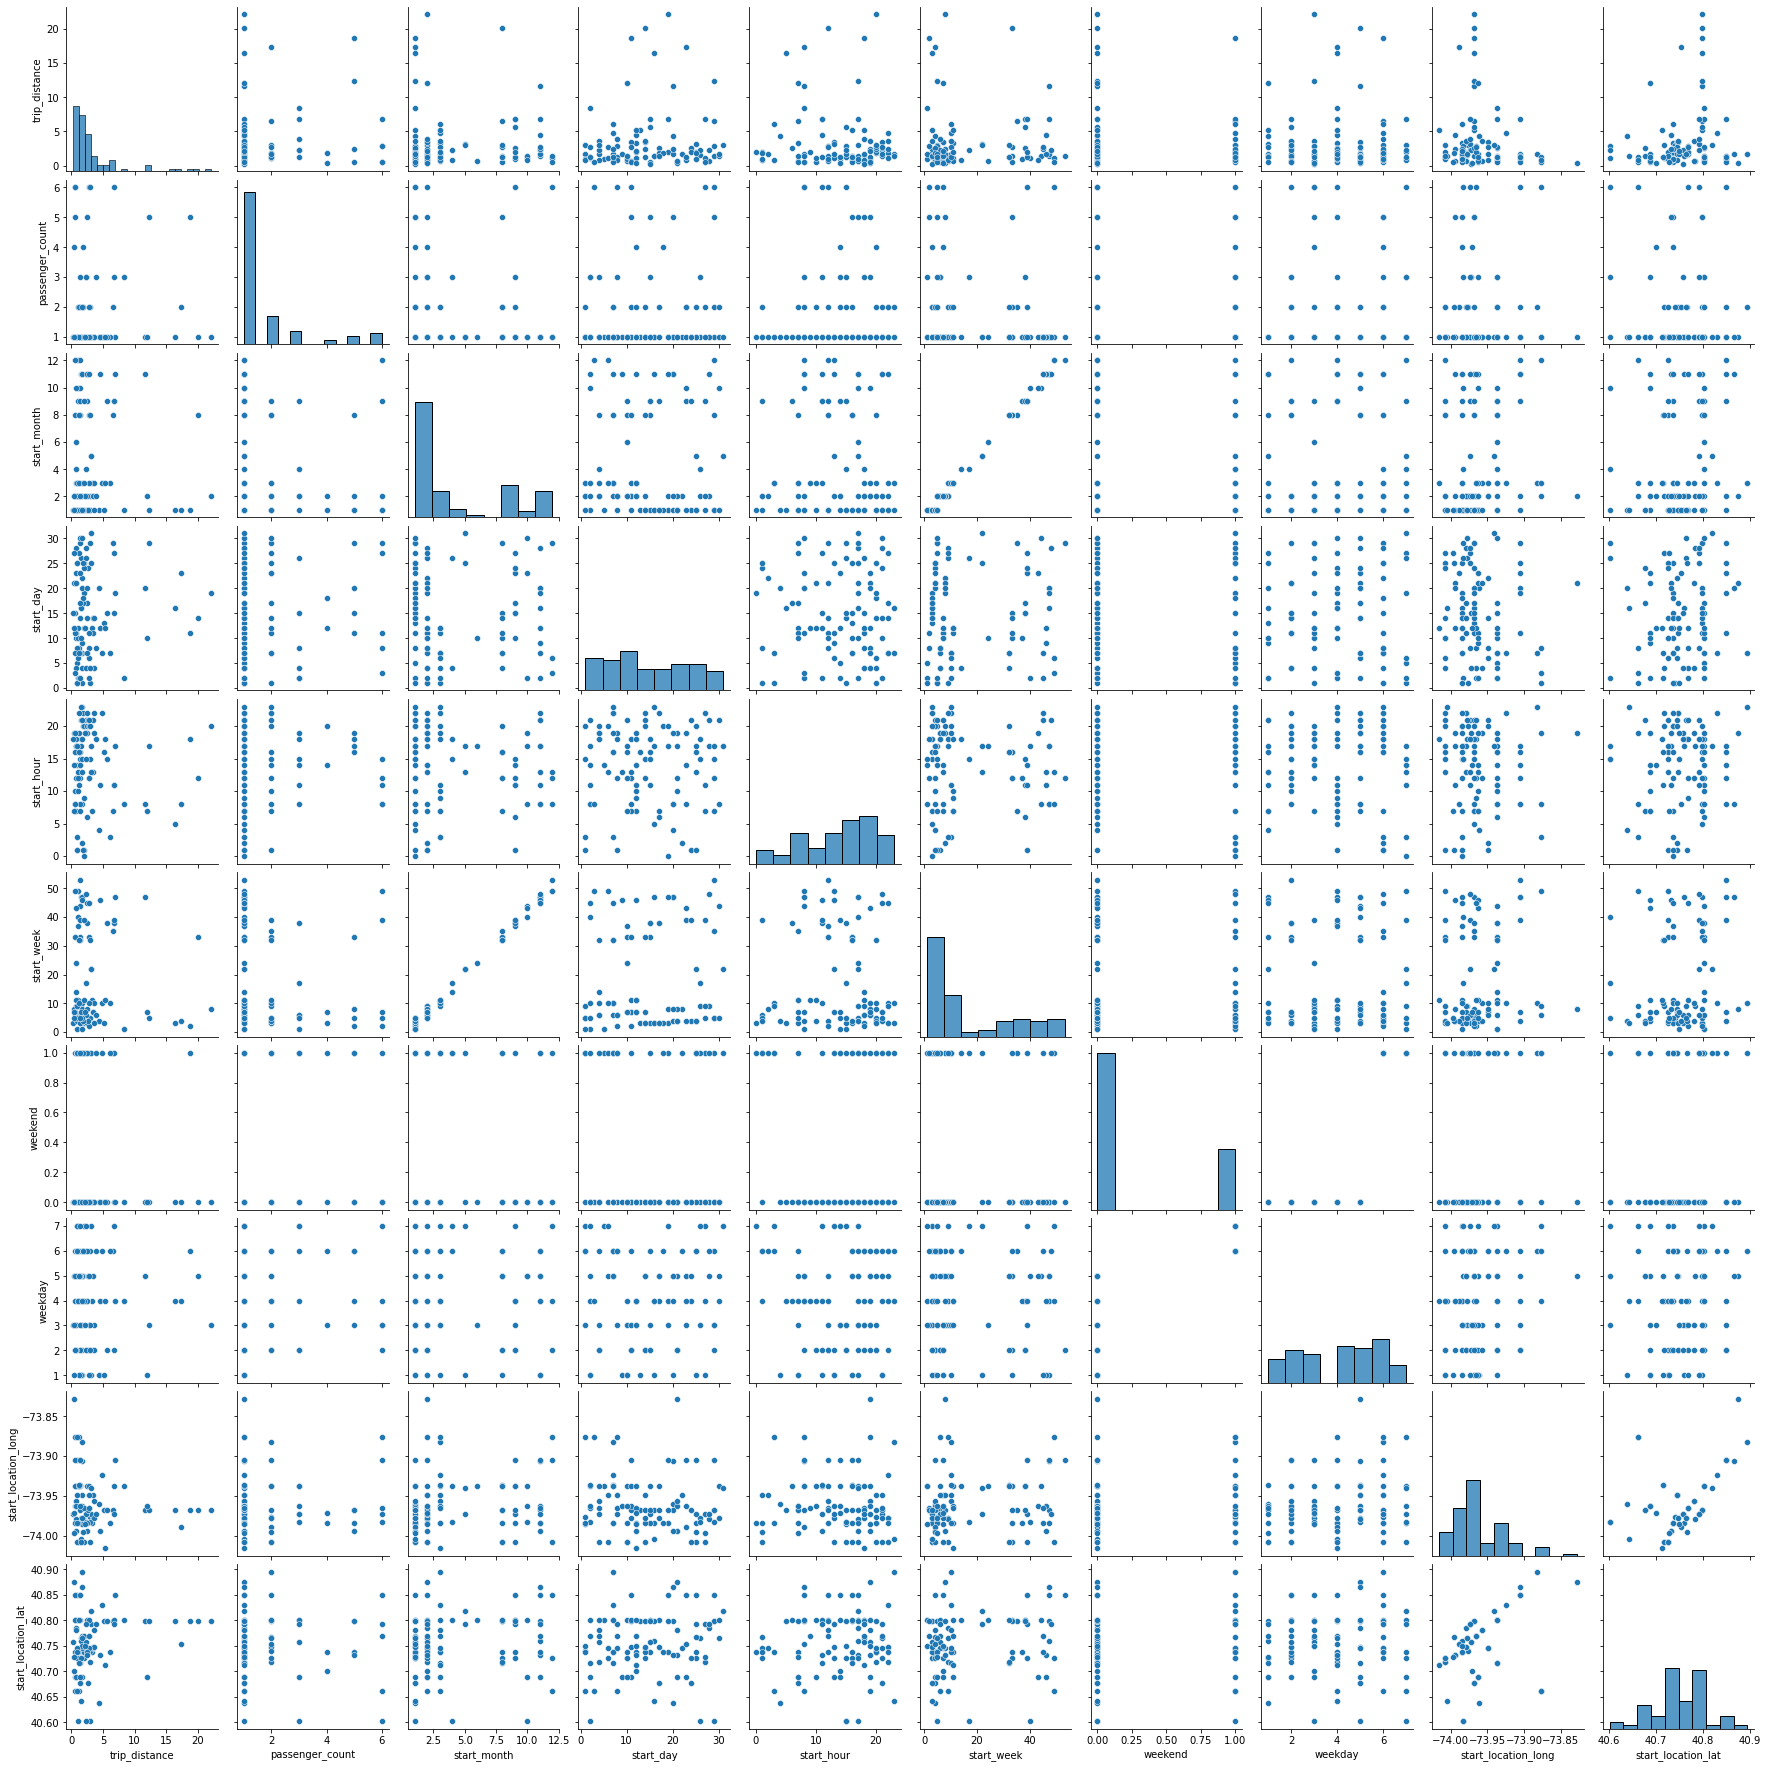

In [9]:
sns.pairplot(trip_data_start.sample(100))

In [10]:
trip_data_start["trip_distance"].describe()

count    7.293205e+06
mean     3.724204e+00
std      4.725954e+00
min      1.000000e-02
25%      1.100000e+00
50%      1.900000e+00
75%      3.900000e+00
max      3.051000e+02
Name: trip_distance, dtype: float64

<AxesSubplot:xlabel='trip_distance', ylabel='Count'>

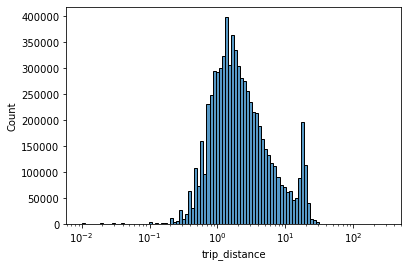

In [11]:
sns.histplot(data=trip_data_start["trip_distance"], log_scale=True, bins=100)

## Alternatives for adding dummy variables

In [12]:
test_data = trip_data_start[["PUBorough", "PUservice_zone"]].reset_index(drop=True)

In [13]:
test_data["PUBorough"].unique()

array(['Manhattan', 'Queens', 'Bronx', 'Brooklyn', 'Staten Island', 'EWR'],
      dtype=object)

In [14]:
test_data["PUservice_zone"].unique()

array(['Yellow Zone', 'Airports', 'Boro Zone', 'EWR'], dtype=object)

### ColumnTransformer

In [15]:
ct = ColumnTransformer([("borough", OneHotEncoder(), ["PUBorough", "PUservice_zone"])])
test = ct.fit_transform(test_data)
pd.DataFrame(test.todense())

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
7293200,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
7293201,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
7293202,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
7293203,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


### OneHotEncoder

In [16]:
enc = OneHotEncoder()
enc.fit(test_data)
test2 = enc.transform(test_data)
test2_df = pd.DataFrame(test.todense(), columns=enc.get_feature_names())
test2_df

,x0_Bronx,x0_Brooklyn,x0_EWR,x0_Manhattan,x0_Queens,x0_Staten Island,x1_Airports,x1_Boro Zone,x1_EWR,x1_Yellow Zone
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
7293200,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
7293201,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
7293202,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
7293203,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


### Pandas get_dummies

In [17]:
test3 = pd.get_dummies(test_data, prefix="Dummy")
test3

,Dummy_Bronx,Dummy_Brooklyn,Dummy_EWR,Dummy_Manhattan,Dummy_Queens,Dummy_Staten Island,Dummy_Airports,Dummy_Boro Zone,Dummy_EWR,Dummy_Yellow Zone
0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
7293200,0,0,0,0,1,0,1,0,0,0
7293201,0,0,0,0,1,0,1,0,0,0
7293202,0,0,0,0,1,0,1,0,0,0
7293203,0,0,0,0,1,0,1,0,0,0


In [18]:
pd.concat([test_data, test2_df], axis=1)

,PUBorough,PUservice_zone,x0_Bronx,x0_Brooklyn,x0_EWR,x0_Manhattan,x0_Queens,x0_Staten Island,x1_Airports,x1_Boro Zone,x1_EWR,x1_Yellow Zone
0,Manhattan,Yellow Zone,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Manhattan,Yellow Zone,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Manhattan,Yellow Zone,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Manhattan,Yellow Zone,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Manhattan,Yellow Zone,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7293200,Queens,Airports,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
7293201,Queens,Airports,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
7293202,Queens,Airports,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
7293203,Queens,Airports,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


## Training a linear model

In [19]:
X = trip_data_start[['passenger_count', 'PULocationID', 'start_month','start_day', 'start_hour', 'start_week', 'weekend', 'weekday']]
y = trip_data_start['trip_distance']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [21]:
scaler = RobustScaler() #StandardScaler()

In [22]:
X_train_scaled = scaler.fit_transform(X_train)

In [23]:
X_train_scaled

array([[ 0.        , -0.78823529, -0.14285714, ..., -0.25925926,
         1.        ,  0.5       ],
       [ 0.        ,  0.92941176,  1.28571429, ...,  1.2962963 ,
         1.        ,  0.75      ],
       [ 0.        ,  0.        ,  0.85714286, ...,  0.96296296,
         0.        ,  0.25      ],
       ...,
       [ 1.        , -1.4       ,  0.14285714, ...,  0.07407407,
         0.        , -0.5       ],
       [ 5.        , -0.49411765,  1.42857143, ...,  1.59259259,
         0.        ,  0.25      ],
       [ 0.        ,  0.        ,  0.        , ..., -0.14814815,
         1.        ,  0.5       ]])

In [24]:
lin = LinearRegression()
lin.fit(X_train_scaled, y_train)

LinearRegression()

In [25]:
X_test_scaled =scaler.transform(X_test)

In [26]:
y_prediction = lin.predict(X_test_scaled)

In [27]:
pd.DataFrame(y_test).describe()

,trip_distance
count,2.187962e+06
mean,3.725826e+00
std,4.730970e+00
min,1.000000e-02
25%,1.100000e+00
50%,1.900000e+00
75%,3.900000e+00
max,2.778000e+02


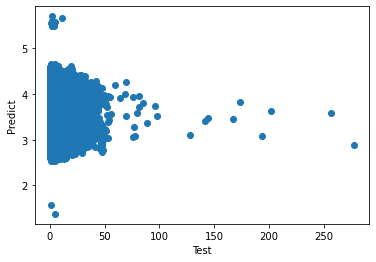

In [28]:
plt.scatter(y_test, y_prediction)
plt.xlabel("Test")
plt.ylabel("Predict")
plt.show()

In [29]:
np.sqrt(metrics.mean_squared_error(y_test, y_prediction))

4.718296162963435

In [30]:
metrics.mean_absolute_error(y_test, y_prediction)

3.133641667610702